In [1]:
# == Import libraries ==
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# == Import Dataset ==
df = pd.read_csv('Energy Production Dataset.csv', sep = ',')

In [3]:
# == Data visualization ===
df.head(20)

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387
5,11/30/2025,4,5,Wind,334,Sunday,November,Fall,4231
6,11/30/2025,5,6,Wind,334,Sunday,November,Fall,4365
7,11/30/2025,8,9,Wind,334,Sunday,November,Fall,4801
8,11/30/2025,12,13,Wind,334,Sunday,November,Fall,7737
9,11/30/2025,15,16,Wind,334,Sunday,November,Fall,5584


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         51864 non-null  object
 1   Start_Hour   51864 non-null  int64 
 2   End_Hour     51864 non-null  int64 
 3   Source       51864 non-null  object
 4   Day_of_Year  51864 non-null  int64 
 5   Day_Name     51864 non-null  object
 6   Month_Name   51864 non-null  object
 7   Season       51864 non-null  object
 8   Production   51864 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


In [5]:
df.describe()

,Start_Hour,End_Hour,Day_of_Year,Production
count,51864.000000,51864.000000,51864.000000,51864.000000
mean,11.500000,11.500000,180.798415,6215.069933
std,6.922253,6.922253,104.291387,3978.364965
min,0.000000,0.000000,1.000000,58.000000
25%,5.750000,5.750000,91.000000,3111.000000
50%,11.500000,11.500000,181.000000,5372.000000
75%,17.250000,17.250000,271.000000,8501.000000
max,23.000000,23.000000,366.000000,23446.000000


In [6]:
# ====================== Data Cleaning ======================

In [7]:
    # == Correct Datatype ==
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
    # == Search for traslapes ==
df = df.sort_values(by=['Source', 'Date', 'Start_Hour'])
df['Prev_End_Hour'] = df.groupby(['Source', 'Date'])['End_Hour'].shift(1)
traslapes = df[df['Start_Hour'] < df['Prev_End_Hour']]

In [9]:
# == Show result for traslapes ==
if traslapes.empty:
    print("True")
else:
    print(f"Err")
    print(traslapes[['Date', 'Source', 'Start_Hour', 'End_Hour', 'Prev_End_Hour']])

Err
            Date Source  Start_Hour  End_Hour  Prev_End_Hour
44707 2020-10-25   Wind           2         3            3.0
35795 2021-10-31   Wind           2         3            3.0
27063 2022-10-30   Wind           2         3            3.0
18328 2023-10-29   Wind           2         3            3.0
9581  2024-10-27   Wind           2         3            3.0
860   2025-10-26   Wind           2         3            3.0


In [10]:
# == Search for Outliers ==
    # == Mean - Standar ==
mean = df['Production'].mean()
std = df['Production'].std()

In [11]:
    # == Z-core ==
df['z_score'] = (df['Production'] - mean) / std
outliers = df[abs(df['z_score']) > 3]

print(f"Valor máximo encontrado: {df['Production'].max()}")
print(f"Número de posibles outliers: {len(outliers)}")
display(outliers.sort_values(by='Production', ascending=False).head())

Valor máximo encontrado: 23446
Número de posibles outliers: 402


,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production,Prev_End_Hour,z_score
919,2025-10-23,12,13,Wind,296,Thursday,October,Fall,23446,12.0,4.331159
14696,2024-03-28,13,14,Wind,88,Thursday,March,Spring,23264,13.0,4.285411
14706,2024-03-28,14,15,Wind,88,Thursday,March,Spring,23204,14.0,4.270330
929,2025-10-23,13,14,Wind,296,Thursday,October,Fall,23081,13.0,4.239412
14699,2024-03-28,12,13,Wind,88,Thursday,March,Spring,23008,12.0,4.221063


In [12]:
    # == Comprobe outliers ==
top_outliers_dates = outliers.sort_values(by='Production', ascending=False).head(5)['Date']

    # == Bucle for show the date and the preview moments for the outlier ==
for fecha in top_outliers_dates:
        specific_day = df[(df['Date'] == fecha) & (df['Source'] == 'Wind')]
        tendencies = specific_day.sort_values(by='Start_Hour')[['Start_Hour', 'End_Hour', 'Production']]
print(tendencies)

       Start_Hour  End_Hour  Production
14710           0         1       14268
14701           1         2       14376
14711           2         3       15127
14698           3         4       15546
14697           4         5       14967
14709           5         6       14768
14707           6         7       14841
14700           7         8       15504
14708           8         9       17175
14703           9        10       19786
14690          10        11       21569
14692          11        12       22511
14699          12        13       23008
14696          13        14       23264
14706          14        15       23204
14695          15        16       22347
14691          16        17       20684
14688          17        18       18361
14689          18        19       16192
14705          19        20       15909
14704          20        21       15521
14693          21        22       15209
14694          22        23       14530
14702          23         0       13616


In [13]:
# == One-Hot Encodign ==
df_final = pd.get_dummies(df, columns=['Source', 'Season'], prefix=['Type', 'Season'])
print(df_final.columns)

Index(['Date', 'Start_Hour', 'End_Hour', 'Day_of_Year', 'Day_Name',
       'Month_Name', 'Production', 'Prev_End_Hour', 'z_score', 'Type_Mixed',
       'Type_Solar', 'Type_Wind', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')


In [14]:
# == Cyclical Variable ==
    # 24 hours cicle
df_final['hour_sin'] = np.sin(2 * np.pi * df_final['Start_Hour'] / 24)
df_final['hour_cos'] = np.cos(2 * np.pi * df_final['Start_Hour'] / 24)

    # 365 days cicle
df_final['day_sin'] = np.sin(2 * np.pi * df_final['Day_of_Year'] / 365)
df_final['day_cos'] = np.cos(2 * np.pi * df_final['Day_of_Year'] / 365)

In [15]:
# == Lag ==
    # Order by type source and time
df_final = df_final.sort_values(by=['Type_Wind', 'Date', 'Start_Hour'])

    # Create the lag for 1 hour
df_final['prod_lag_1h'] = df_final.groupby(['Type_Wind', 'Type_Solar'])['Production'].shift(1)

    # Create the lag for 24 hours
df_final['prod_lag_24h'] = df_final.groupby(['Type_Wind', 'Type_Solar'])['Production'].shift(24)

In [16]:
# == Rolling Mean ==
df_final['prod_rolling_3h'] = df_final.groupby(['Type_Wind', 'Type_Solar'])['Production'].transform(lambda x: x.rolling(window=3).mean())

In [17]:
# == Dropna ==
print(f"Rows before cleaning: {len(df_final)}")
df_final = df_final.dropna()
print(f"Rows after cleaning: {len(df_final)}")

Rows before cleaning: 51864
Rows after cleaning: 48447


In [18]:
# ====================== Exploratoy Data Analisis ======================

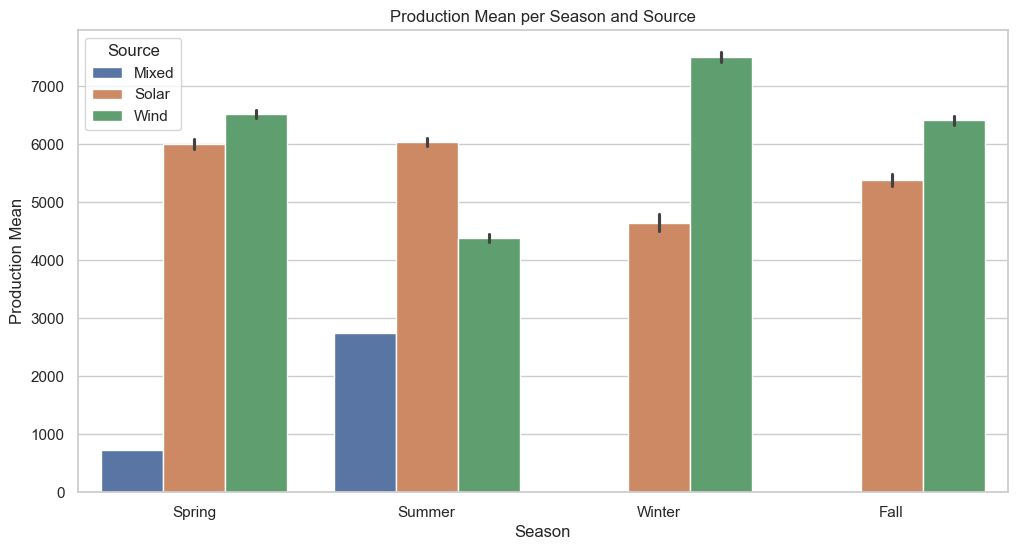

In [19]:
sns.set_theme(style="whitegrid")

# Production Mean per Season and Source
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Season', y='Production', hue='Source', estimator='mean')
plt.title('Production Mean per Season and Source')
plt.ylabel('Production Mean')
plt.show()

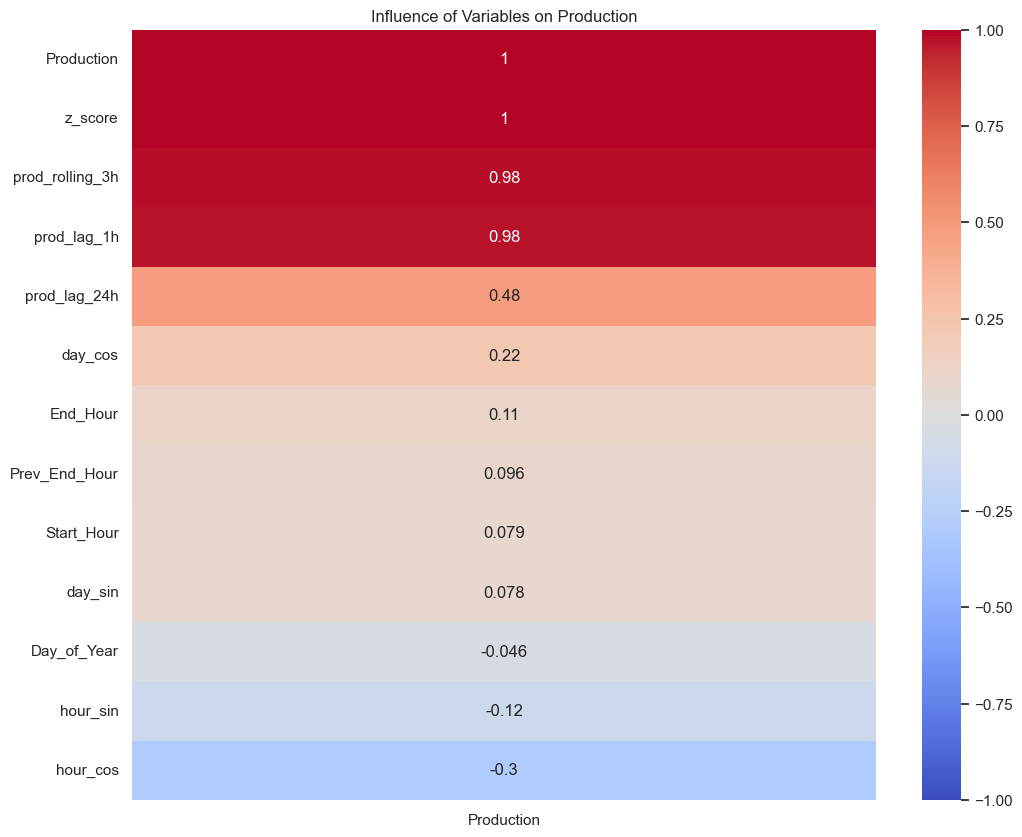

In [20]:
# == Correlation: Influence on production ==
numeric_cols = df_final.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Production']].sort_values(by='Production', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Influence of Variables on Production')
plt.show()

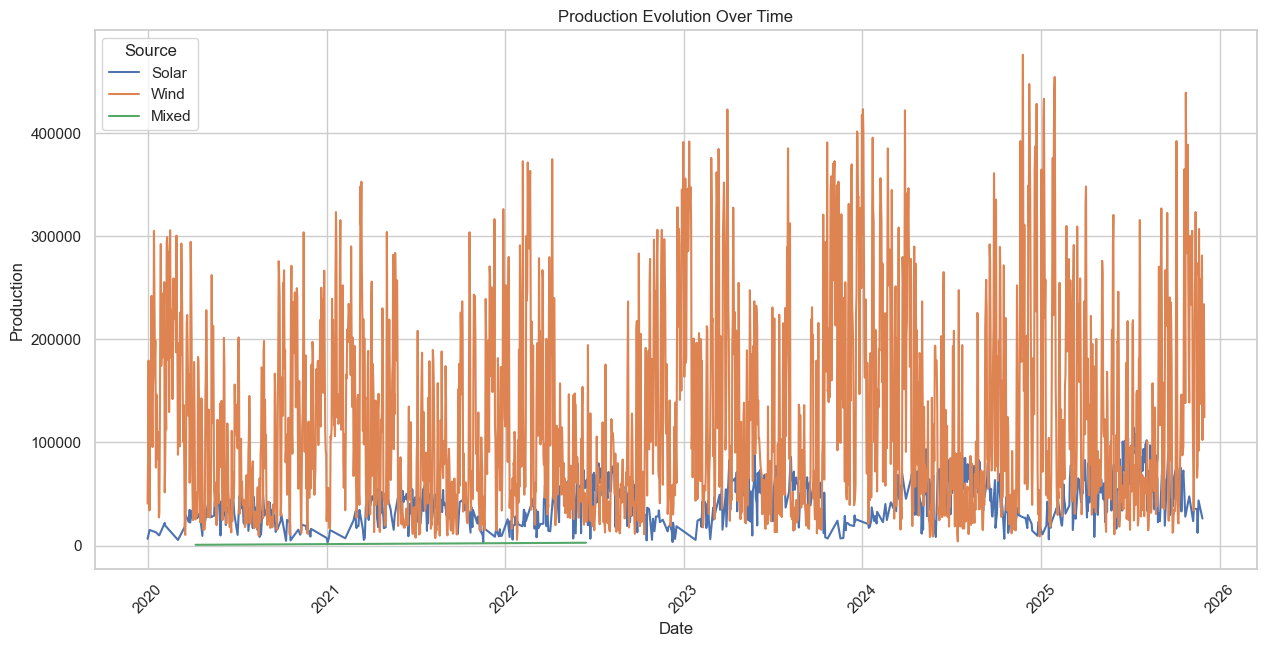

In [21]:
# == Time Series Visualization ==
# Group by date to see the total production
daily_prod = df.groupby(['Date', 'Source'])['Production'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_prod, x='Date', y='Production', hue='Source')
plt.title('Production Evolution Over Time')
plt.xticks(rotation=45)
plt.show()

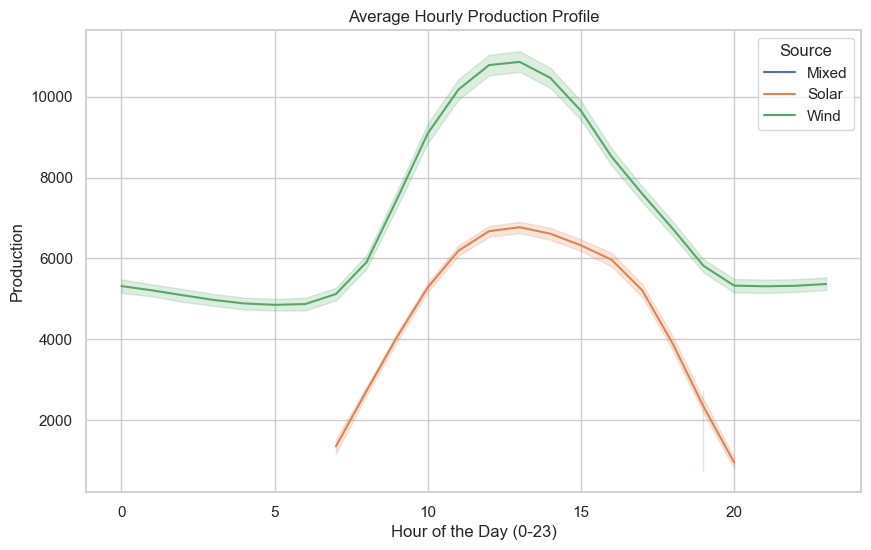

In [22]:
# == Daily Cicle ==
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Start_Hour', y='Production', hue='Source')
plt.title('Average Hourly Production Profile')
plt.xlabel('Hour of the Day (0-23)')
plt.show()

In [23]:
# ====================== Analytical Analysis ======================

Production Mean: Weakly vs Weekend
Source       Mixed        Solar         Wind
Is_Weekend                                  
False       1737.0  5891.098820  6295.887636
True           NaN  5540.044265  6338.861125


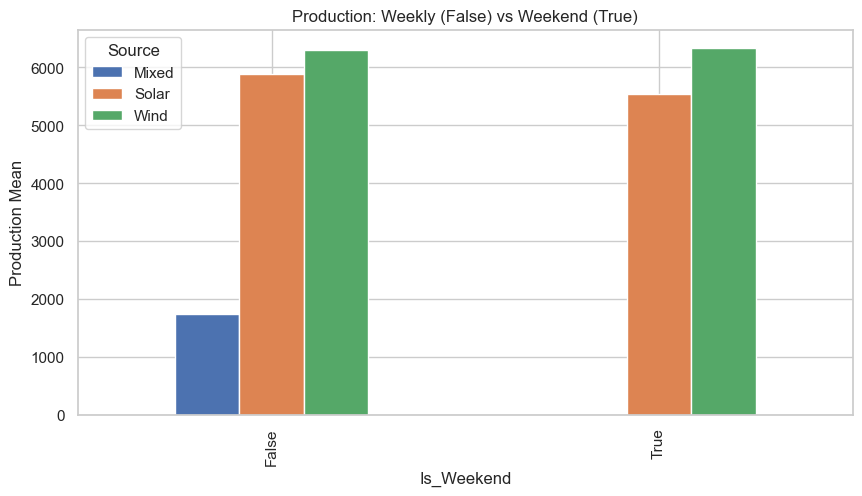

In [24]:
# == Create Type Day Column ==
df['Is_Weekend'] = df['Day_Name'].isin(['Saturday', 'Sunday'])

# Comparamos promedios
weekly_analysis = df.groupby(['Is_Weekend', 'Source'])['Production'].mean().unstack()
print("Production Mean: Weakly vs Weekend")
print(weekly_analysis)

# Visualización
weekly_analysis.plot(kind='bar', figsize=(10, 5))
plt.title('Production: Weekly (False) vs Weekend (True)')
plt.ylabel('Production Mean')
plt.show()

In [25]:
# == ANOVA ==
groups = [group['Production'].values for name, group in df.groupby('Source')]
f_stat, p_value = stats.f_oneway(*groups)

print(f"Stadistic F: {f_stat:.2f}")
print(f"Value p: {p_value:.4e}")

if p_value < 0.05:
    print("Result: The energy source significantly influences production.")
else:
    print("Result: There is no statistically significant difference between the sources.")

Stadistic F: 65.65
Value p: 3.3419e-29
Result: The energy source significantly influences production.


In [26]:
# == Hypotesis Testing: Winter vs Summer ==
winter_prod = df[df['Season'] == 'Winter']['Production']
summer_prod = df[df['Season'] == 'Summer']['Production']

t_stat, p_val_t = stats.ttest_ind(winter_prod, summer_prod)

print(f"T-test: {t_stat:.2f}")
print(f"Value p: {p_val_t:.4e}")

if p_val_t < 0.05:
    print("The difference in production between Winter and Summer is real")
else:
    print("There is not enough evidence to say that the seasons change production.")

T-test: 50.55
Value p: 0.0000e+00
The difference in production between Winter and Summer is real


In [27]:
# ====================== Predictive Analysis (Modeling) ======================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [28]:
# == Data Division ==

features = ['Start_Hour', 'Day_of_Year', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 
            'Type_Solar', 'Type_Wind', 'Season_Fall', 'Season_Spring', 
            'Season_Summer', 'Season_Winter', 'prod_lag_1h', 'prod_rolling_3h']

X = df_final[features]
y = df_final['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# == Random Forest Training ==
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)
print("Model trained succesfully!")

Model trained succesfully!


In [30]:
# == Evaluating Model ==
predictions = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"(MAE): {mae:.2f} units")
print(f"Precision (R2 Score): {r2:.4f}")

(MAE): 358.87 units
Precision (R2 Score): 0.9807


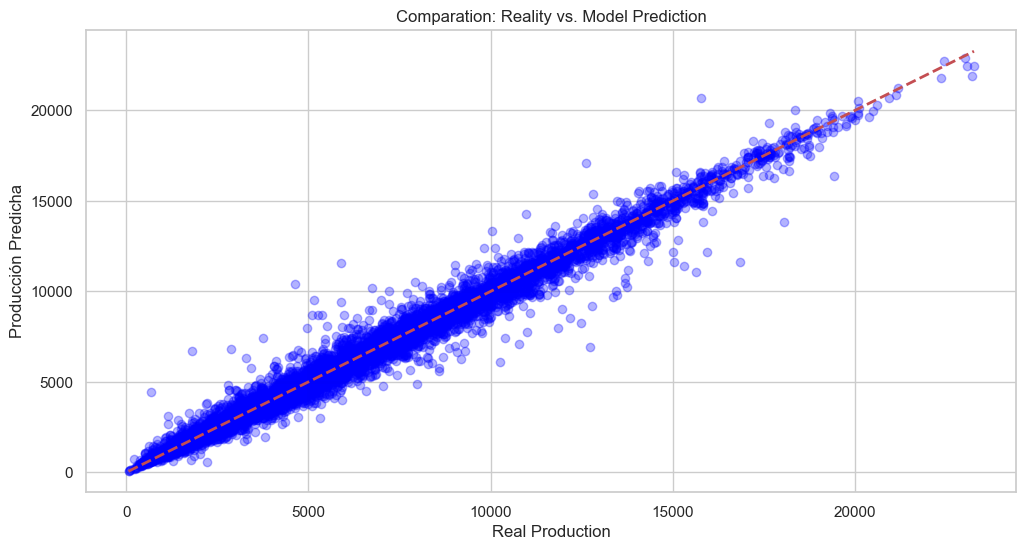

In [31]:
# == Visualization Prediction ==
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Production')
plt.ylabel('Producción Predicha')
plt.title('Comparation: Reality vs. Model Prediction')
plt.show()

In [ ]:
# ====================== Prediction Simulator ======================
def energySim(source, hour, dayYear, pastProdHour):
    # 1. Variable Source
    wind = 1 if source.lower() == 'wind' else 0
    solar = 1 if source.lower() == 'solar' else 0
    
    # 2. Automatic Ciclic Transformation
    h_sin = np.sin(2 * np.pi * hour / 24)
    h_cos = np.cos(2 * np.pi * hour / 24)
    d_sin = np.sin(2 * np.pi * dayYear / 365)
    d_cos = np.cos(2 * np.pi * dayYear / 365)
    
    # 3. Season Year
    seasons = {'Fall': 0, 'Spring': 0, 'Summer': 0, 'Winter': 0}
    if 80 <= dayYear <= 171: seasons['Spring'] = 1
    elif 172 <= dayYear <= 264: seasons['Summer'] = 1
    elif 265 <= dayYear <= 354: seasons['Fall'] = 1
    else: seasons['Winter'] = 1

    # 4. Create the data vector
    datos_input = pd.DataFrame([[
        hour, dayYear, h_sin, h_cos, d_sin, d_cos,
        solar, wind, seasons['Fall'], seasons['Spring'],
        seasons['Summer'], seasons['Winter'], pastProdHour, pastProdHour
    ]], columns=features)
    
    # 5. Prediction
    prediction = model_rf.predict(datos_input)[0]
    
    print(f"--- Prediction ---")
    print(f"For the source type {source.upper()} at {hour}:00hs (Day {dayYear} of the year)")
    print(f"If the last hour produced {pastProdHour} units")
    print(f"You will produce: {prediction:.2f} units.")

In [36]:
# === Prove the model here ===
energySim(source = 'Wind', hour = 15, dayYear= 362, pastProdHour=5850.12)

--- 🔮 Prediction ---
For the source type WIND at 15:00hs (Day 362 of the year)
If the last hour produced 5850.12 units
You will produce: 5163.21 units.
